<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/5_Navigateur_et_%C3%A9v%C3%A9nements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
------------
Les cellules de cette section installent l'extension qui customise les cellules JavaScript et HTML. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

In [ ]:
!pip3 install classroom-extensions
%load_ext classroom_extensions.web

# Navigateurs et applications Web
----------------

<img alt="Browsers" src="https://i.pcmag.com/imagery/roundups/03gXNuxiiy22Rd9583sPojG-1.fit_lim.size_1600x900.v1614012534.jpg" width="370px" align="right"/>

* Les navigateurs web offrent une multitude de fonctionnalités et de services aux applications, contribuant ainsi à l'expérience utilisateur et à la création d'applications web riches et interactives.

* Les navigateurs fournissent plusieurs fonctionnalités telles que l'affichage des pages, la manipulation du DOM, des engins JavaScript, les APIs de manipulation du DOM, gestion d'événements, stockage local et historique, sécurité, etc.

* Les prochaines sections visent à expliquer la gestion des événements émis par différents composants d'une page HTML et qui permettent aux applications web de transmettre des messages à travers le réseau et de recevoir des données en provenance des serveurs.

## Carré de sable (*sandbox*) du navigateur

* L'exécution de programmes téléchargés à partir d'Internet pose toujours des risques. C'est pourquoi les navigateurs limitent considérablement les actions d'un programme JavaScript qui ne peut pas consulter le système de fichiers local ni modifier quoi que ce soit hors de la page Web dans laquelle le code a été intégré.

* C'est le principe de la Politique de Même Origine (*Same Origin Policy - SOP*), un concept fondamental en sécurité web. Il établit que les ressources chargées dans un navigateur web, telles que des scripts JavaScript, des images ou des données, ne peuvent être accédées ou manipulées par un script provenant d'une origine différente de celle de la ressource.


## Applications web monopages

* La plupart des applications Web actuelles suivent l'architecture d'Application monopage (SPA). Dans cette architecture, le navigateur télécharge les fichiers HTML et JavaScript qui sont utilisés pour démarrer l'application et construire le DOM dont la représentation visuelle sera affichée par le navigateur.

* Le code contiendra généralement des fonctions qui sont souscrites à des événements pour gérer de différentes facettes de l'application web, tels que des événements.

* Des événements peuvent être déclenchés lors de l'interaction d'un utilisateur avec l'application ou pour traiter des données en provenance du serveur.

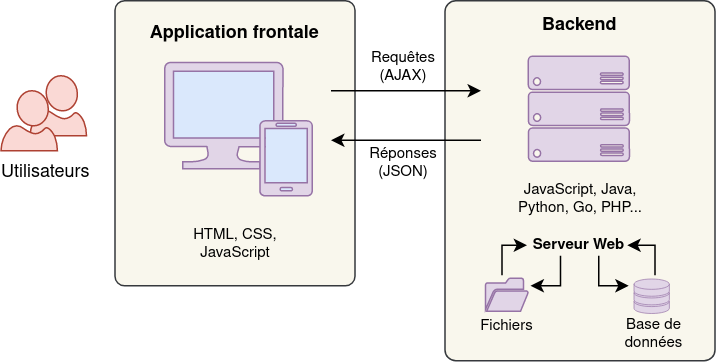

* Une fois que la page initiale de l'application est construite et affichée, l'interaction avec le serveur se fait par le biais des requêtes `AJAX` ou `Fetch` sans avoir besoin de rafraîchir toute la page Web.

* Les données envoyées par le serveur sont normalement traitées par l'application via des fonctions de rappels ou des promesses, que nous aborderons plus tard dans le cours.

# Le modèle d'exécution de JavaScript
-----------

* Comme nous l'avons observé dans les précédents cahiers, JavaScript repose largement sur l'utilisation de fonctions. Chaque fois qu'une fonction en appelle une autre, elle **ajoute un élément supplémentaire à la pile d'appels**; une manière sophistiquée de décrire l'augmentation de la taille de la pile de fonctions en cours d'exécution.

* Cependant, JavaScript ne se contraint pas à s'exécuter dans une seule pile d'appels tout au long de la durée de vie d'une application. L'engin JavaScript gère la concurrence au moyen d'une [boucle d'événements](https://developer.mozilla.org/fr/docs/Web/JavaScript/EventLoop) (**event loop**).

* Pour l'instant, considérons que la boucle d'événements, en quelque sorte, est une boucle à l'infini qui vérifie en permanence s'il y a du travail à effectuer:
  - Lorsque la boucle trouve une fonction à exécuter, elle commence son exécution avec une nouvelle pile d'appels.
  - Une fois la fonction terminée, la boucle attend que d'autres fonctions soient prêtes à être exécutées.

## Piles d'exécutions multiples

* Regardons un exemple avec la fonction [`setTimeout()`](https://developer.mozilla.org/en-US/docs/Web/API/setTimeout), qui permet de définir un minuteur (*timer*) qui exécute une fonction ou un code donné après la fin du délai indiqué.

In [ ]:
%%javascript

function a() { b(); }
function b() { c(); }
function c() { console.log("c"); }

function x() { y(); }
function y() { z(); }
function z() { console.log("z"); }

setTimeout(x, 0); // la pile a,b,c sera exécutée avant x,y,z. Pourquoi?
a();

<classroom_extensions.web.JavascriptWithConsole object>

* Tout d'abord, la boucle exécute la fonction `a()` dans la pile actuelle et appelle également la fonction `setTimeout()` qui mettra en file d'attente la fonction `x()`.

* Quand la pile actuelle est terminée, la boucle d'événements vérifie s'il reste du travail à exécuter.

* Il ne s'agit pas, par exemple, de vérifier après chaque instruction. Puisqu'il ne se passe pas grand-chose dans ce programme simple, la fonction `x()` sera la prochaine exécutée après la fin de la première pile.

* La figure ci-dessous offre une visualisation de cet exemple. L'axe horizontal représente le temps ; le code dans chaque fonction prend naturellement du temps à s'exécuter. Remarquez qu'il y a deux piles distinctes et que la taille de chacune augmente à mesure que d'autres fonctions sont appelées.

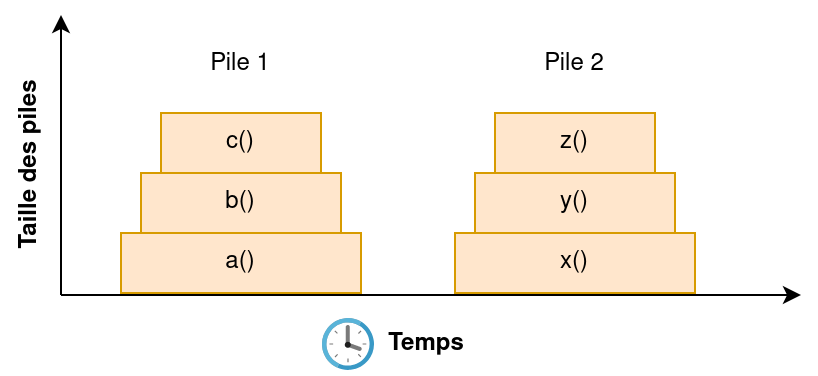

* La fonction `setTimeout()` dit essentiellement :
  - Essayez d'exécuter la fonction fournie dans `0` ms à partir de maintenant.

* Cependant, la fonction `x()` ne s'exécute ni immédiatement, car la pile d'appels `a()` est toujours en cours, ni immédiatement après la fin de la pile d'appels `a()`. La boucle d'événements prend un temps pour vérifier s'il reste du travail à effectuer.

* Les fonctions peuvent prendre beaucoup de temps à s'exécuter. Si la fonction `a()` a pris `100` ms pour s'exécuter, alors le plus tôt vous devriez vous attendre à ce que `x()` s'exécute peut être de `101` ms. Considérez alors l'argument `time` comme l'heure à laquelle la fonction peut être appelée.

* **La fonction `x()` est exécutée de façon asynchrone.** On dit aussi qu'une fonction qui prend beaucoup de temps à s'exécuter **bloque la boucle d'événements**.


## Modèle asynchrone

* Supposons qu'un programme doit récupérer deux ressources hébergées par un serveur web et combiner les résultats. Dans un modèle synchrone, le programme fera d'abord une requête, attendra la réponse, et ensuite enverra la deuxième requête.

* Une façon d'améliorer ce scénario est de créer plusieurs threads cart la création d'un deuxième thread permet d'exécuter les deux requêtes de façon concurrente, et ensuite de synchroniser les résultats.

* Une application à plusieurs threads est, par contre, plus difficile à coder et à gérer car il faut recourir à différents mécanismes de **synchronisation**.

* Au lieu d'utiliser des threads, l'engin JavaScript exécute de façon asynchrone les tâches qui peuvent prendre un certain temps.


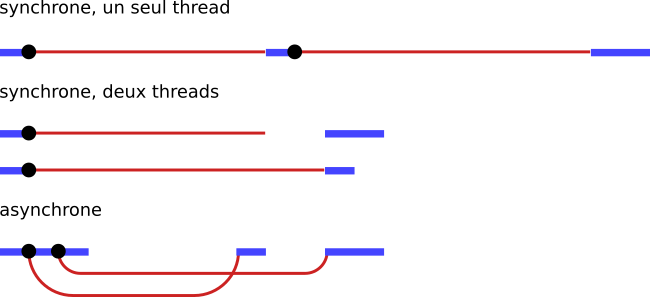

**Adapté de:** Eloquent Javascript: A Modern Introduction to Programming

Le schéma ci-dessus met en évidence les distinctions entre les modèles. Les lignes épaisses représentent la période durant laquelle le programme est en cours d'exécution, tandis que les lignes fines illustrent l'attente du programme en vue de l'achèvement d'une requête réseau.

## Threads: avantages et inconvénients

* Le modèle asynchrone qui repose sur l'utilisation de plusieurs threads comporte divers avantages et inconvénients.

* Avantages:
  - Parallélisation de l'exécution (si bien codé).
  - Amélioration de la fluidité de l'interface.
  - Modèle bien connu et implanté dans plusieurs langages et standards.

* Inconvénients:
  - Complexifie le raisonnement d'exécution du code.
  - La synchronisation peut être complexe, et peut rendre difficile l'assurance d'une synchronisation et d'une protection adéquate des données (celles-ci pouvant être partagées entre les threads).
  - *Race condition* (le comportement du système dépend de l'ordre d'exécution) et *deadlock*.

## JavaScript: modèle à thread unique

* JavaScript fonctionne selon un modèle d'exécution à thread unique. Dans les cahiers à venir, nous examinerons comment Node.js, un framework utilisé pour les applications côté serveur, utilise plusieurs threads pour gérer les opérations d'entrée/sortie. Cependant, le modèle d'exécution demeure identique, toujours basé sur le concept de thread unique.

* Essentiellement, en JavaScript tout code qui ne termine pas son exécution dans un *délai raisonnable* ira bloquer, y compris:
 - Les événements du navigateur.
 - Les retours d'appels réseau `AJAX`/`Fetch`.
 - Les minuteurs.
 - Les opérations d'entrée-sortie (surtout sur `Node.js`).

* Pour gérer les tâches asynchrones, JavaScript adopte l'une de ces deux approches : exécution immédiate ou exécution plus tard.

  * L'exécution **immédiate** bloque l'exécution jusqu'à que la tâche soit finalisée et le code devrait terminer dans un délai *raisonnable*.

  * Dans l'exécution **plus tard** les appels de fonctions de rappel sont placés en file d'événements, tels que les minuteurs, événements, appels réseau `AJAX`/`Fetch`, requêtes client, connection à des bases de données, accès à des fichiers, etc.


## La file d'événements de JavaScript

<!--
<img src="https://miro.medium.com/max/2400/1*iHhUyO4DliDwa6x_cO5E3A.gif"/>

Source: [Understanding Event Loop, Call Stack, Event & Job Queue in Javascript](https://medium.com/@Rahulx1/understanding-event-loop-call-stack-event-job-queue-in-javascript-63dcd2c71ecd)

-->

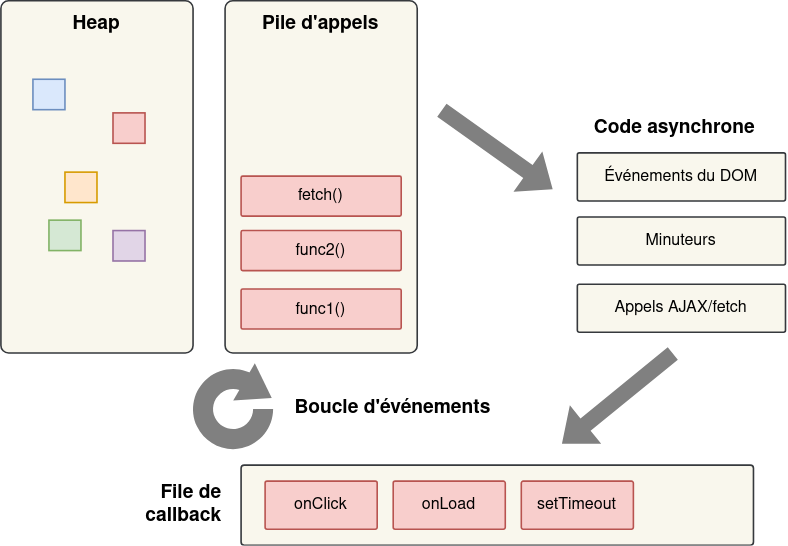

## Fonctions de rappel (callbacks)

* Une approche asynchrone consiste à faire en sorte que les fonctions qui effectuent une action lente, et qui peuvent bloquer l'exécution, prennent un argument supplémentaire:
  - Une fonction de rappel (*callback*). L'action démarre, et lorsqu'elle se termine, la fonction de rappel est appelée avec le résultat.

* **Une fonction de rappel est donc une fonction qui sera invoquée lorsqu'un événement quelconque aura terminé (succès ou échec).**

* Une fonction de rappel fournie à `setTimeout()`:

In [ ]:
%%javascript

setTimeout(() => console.log("Trois secondes ecoulées..."), 3000);
console.log("Ici");

<classroom_extensions.web.JavascriptWithConsole object>

* D'autres exemples:

In [ ]:
%%javascript

function callback() {
	console.log("Une fonction de rappel appelée");
}

setTimeout(callback, 3000);
setTimeout(() => {console.log("Une autre fonction de rappel appelée");}, 1000);
setTimeout(() => {console.log("Encore une autre fonction de rappel appelée");}, 1000);

<classroom_extensions.web.JavascriptWithConsole object>

* Exemple avec des appels `setTimeout()` imbriqués:

In [ ]:
%%javascript

let x = 0;
console.log("Code est exécuté immédiatement | x=" + x);

// Sera exécuté plus tard, dans 1s
setTimeout(() => {
  x++;
  console.log("Code est exécuté après 1 s. | x=" + x);

  setTimeout(() => {
    x++;
    console.log("Code est exécuté après 1+1 s. x=" + x);
  }, 1000)
}, 1000);

console.log("x=" + x);

<classroom_extensions.web.JavascriptWithConsole object>

## Phases d'exécution de code JavaScript inclus dans une page

1. L'ensemble du code JavaScript entre balises `<script></script>` est normalement exécuté au fur et à mesure que chaque balise est rencontrée dans le chargement de la page.
  - Le rendu de la page peut être momentanément suspendu (par exemple, si le script est inclus d'un fichier externe et le serveur prend du temps à répondre)
  - Certains scripts peuvent s'exécuter en parallèle au chargement de la page (attribut `async` de la balise `<script>`) ou s'exécuter à la fin du chargement (attribut `defer`).

2. L'exécution de code se produit lorsque certains événements sont déclenchés, au moyen de l'appel des gestionnaires d'événements, et dans l'ordre de leur déclenchement. Il existe plusieurs types d'événements du navigateur, parmis lesquels on peut souligner:
   - **Événements de chargement de page:** déclenchés après le chargement de la page.
   - **Événements générés par l'utilisateur:** clic de souris, mouvement de souris, clavier, saisie de champs de formulaires, etc.
   - **Événements de timers:** `setTimeout()`, `setInterval()`.
   - **Réseau:** messages asynchrones de réponses `AJAX` ou `Fetch`.

# Gestion des événements
---------------

* Les navigateurs utilisent une approche orientée événements, laquelle consiste à notifier un code JavaScript lorsqu'un événement se produit. Les navigateurs permettent d'enregistrer des fonctions en tant que gestionnaires d'événements spécifiques (*callbacks*).

* Il existe une multitude d'événements qui peuvent être déclenchés dans une page web affichée par le navigateur:

   - Événements de la souris (par ex., `mouseclick`, `mousemove`).
   - Événements de la fenêtre (par ex., `load`, `DOMContentLoaded`).
   - Événements de formulaires (par ex., `submit`, `reset`, `changed`).
   - Événements du clavier (par ex., `keydown`, `keyup`, `keypress`).
   - Événements du DOM lui-même.

* Il y a plusieurs incompatibilités au niveau de certains navigateurs sur la nature des événements implémentés, et la façon d'enregistrer des gestionnaires. Dans ce cours, nous nous utiliserons la spécification DOM2+ qui est très bien supportée par les navigateurs actuels.

## Enregistrement de gestionnaires d'événements

* Chaque gestionnaire d'événements de navigateur est enregistré dans un contexte.

* Nous pouvons utiliser la méthode `addEventListener` sur un élément du DOM pour enregistrer un gestionnaire d'événements.

* Les gestionnaires d'événement sont appelés uniquement lorsque l'événement se produit dans le contexte de l'objet sur lequel ils sont enregistrés.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<button class="btn">Cliquez ici</button>
<p class="flow-text">Pas de gestionnaire d'événements pour ce paragraphe.</p>

<script>
  let button = document.querySelector("button");

  button.addEventListener("click", () => {
    console.log("Vous avez cliqué sur le bouton.");
  });
</script>

* Les différentes versions de l'API de manipulation du DOM offrent de différents mécanismes pour enregistrer des gestionnaires:

 - DOM 0 (ancienne méthode): ajouter directement un attribut / propriété (ex., `onclick` ou `onload`) à l'objet DOM ou à la fenêtre.
   - **Inconvénient:** permet uniquement un seul gestionnaire par événement-objet. Un nouveau gestionnaire doit s'enchaîner au gestionaire précédent, et peut potentiellement le remplacer, ce qui peut avoir des effets indésirables
   - La spécification DOM 0 n'était pas un standard officiel, mais elle était implémentée "de facto" dans les navigateurs.

 - DOM 2: refonte complète de l'API des événements du DOM.
     - Permet notamment plusieurs gestionnaires d'événements pour l'objet DOM ou la fenêtre.

 - *DOM 3* et *DOM 4*: ne changent pas le comportement de DOM 2, mais ajoutent de nouvelles APIs.

* [Spécification W3C DOM](https://dom.spec.whatwg.org/#introduction-to-dom-events) ("living standard"):

### Enregistrement de gestionnaires dans la version DOM 0 (obsolète)

* Utiliser la proprité `onevent` en tant que gestionnaire pour l'événement `event`
  - Le tout en minuscules: `onload`, `onmousemove`, etc.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<button class="btn">Cliquez ici</button>
<p class="flow-text">Pas de gestionnaire d'événements pour ce paragraphe.</p>

<script>
  let button = document.querySelector("button");

  button.onclick = function(event) {
    console.log("Vous avez cliqué sur le bouton.");
    return true;
  };
</script>

* La liasion `this` est lié à l'élément du DOM sur lequel le gestionnaire `onclick` est défini.

* Une valeur de retour `false` indique au navigateur de ne pas effectuer l'action par défaut associée à cet événement (ex., cocher une case).

* Pour avoir plusieurs gestionnaires pour le même événement-objet, il fallait sauvegarder les gestionnaires précédents et les invoquer, comme suit:

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<button class="btn">Cliquez ici</button>
<p class="flow-text">Pas de gestionnaire d'événements pour ce paragraphe.</p>

<script>
  let button = document.querySelector("button");

  button.onclick = function(event) {
    console.log("Vous avez cliqué sur le bouton.");
    return true;
  };

  let oldHandler = button.onclick;

  button.onclick = function(event) {
    console.log("Nouveu gestionnaire d'événements.");
    if (oldHandler) return oldHandler(event)
    return true;
  };

</script>

### Enregistrement de gestionnaires pour la version DOM 2+

* La version 2 de l'API de manipulation du DOM offre quelques méthodes appelées dans le context des éléments du DOM pour enregistrer ou supprimer des gestionnaires d'événements:

  - [`addEventListener`](https://developer.mozilla.org/fr/docs/Web/API/EventTarget/addEventListener): pour ajouter un gestionnaire d'événement.

  - [`removeEventListener`](https://developer.mozilla.org/fr/docs/Web/API/EventTarget/removeEventListener): pour retirer un gestionnaire d'événement.

  - [`stopPropagation`](https://developer.mozilla.org/fr/docs/Web/API/Event/stopPropagation) et [`stopImmediatePropagation`](https://developer.mozilla.org/fr/docs/Web/API/Event/stopImmediatePropagation): pour empêcher la propagation d'un événement.

  - [`dispatchEvent`](https://developer.mozilla.org/fr/docs/Web/API/EventTarget/dispatchEvent): pour envoyer un évènement à la cible spécifiée.

### La méthode `addEventListener`

* Cette méthode est appelée sur un elément pour ajouter un gestionnaire à l'élément. Les gestionnaires précédemment définis sont préservés.
* La méthode `addEventListener` accepte les paramètres suivants:
    - `event`: événement pour lequel on enregistre un gestionnaire
    - `handler`: fonction à invoquer lorsque l'événement survient
    - `capture`: enregistrer l'événement à la phase capture (`true`) ou bubble (`false`)

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<input type="button" id="mybutton" class="btn" value="Cliquez sur moi">

<script>
  let b = document.getElementById("mybutton");

  b.addEventListener("click", () => {
		console.log("hello");
	}, false );
</script>

* La méthode `addEventListener` ne remplace pas les gestionnaires précédents (même ceux définis via l'API DOM 0).
* Si plusieurs gestionnaires sont enregistrés, ils sont invoqués selon l'ordre de l'enregistrement **(les gestionnaires DOM 0 sont exécutés en premier)**.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<input type="button" id="mybutton" class="btn" value="Cliquez sur moi">
<script>
  let b = document.getElementById("mybutton");

  b.addEventListener("click", () => {
		console.log("hello");
	}, false);

  b.addEventListener("click", () => {
		console.log("world");
	}, false);
</script>

### La méthode `removeEventListener`

* La méthode `removeEventListener` est appelée sur un elément pour retirer un gestionnaire défini via `addEventListener`, avec les mêmes arguments.
  - Elle ne génère pas d'erreur si la fonction passée n'était pas un gestionnaire.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<input type="button" id="mybutton" class="btn" value="Cliquez sur moi">

<script>
  let handleMouseClick = function() {
		console.log("Vous avez cliqué sur le bouton.");
	};

  let button = document.getElementById("mybutton")

  button.addEventListener("click", handleMouseClick,  false);
  button.removeEventListener("click", handleMouseClick, false);
</script>

### Émettre un événement (`dispatchEvent`)

* Il est possible de générer l'émission d'un événement de manière programmatique (sans qu'il soit provoqué, soit par l'usager ou autre).
* On peut invoquer l'événement de manière synchrone (directement, et non via la file d'événements).
* Il est possible de définir des événements personnalisés, ou d'émettre des événements standards.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<input type="button" id="mybutton" class="btn" value="Cliquez sur moi">

<script>

  const handleSmile = function() {
    console.log("Les étoiles scintillent dans le ciel nocturne, créant un spectacle enchanteur.");
	};

  let button = document.getElementById("mybutton");

  button.addEventListener("smile", handleSmile, false);

  // Création d'un événement
  let event = new Event("smile");
  button.dispatchEvent(event);
</script>

### Le contexte des gestionnaires d'événements

* Le contexte d'un gestionnaire d'événements est l'élément sur lequel l'événement est défini (et donc le `this` de la fonction gestionnaire).

* Les gestionnaires d'événements prennent un paramètre `event` que nous verrons bientôt.

* La valeur de retour n'est pas importante et n'est pas utilisée.

* Permet l'accès aux variables dans la portée dans laquelle le gestionnaire est défini comme toute autre fonction JavaScript.
 - Les fermetures peuvent être utilisées pour passer différents paramètres aux gestionnaires.

## Les objets événements

* Les fonctions gestionnaires d'événements reçoivent un argument : l'objet événement.

* Cet objet événement contient des informations supplémentaires sur l'événement.
  - Par exemple, si nous voulons savoir quel bouton de la souris a été pressé, nous pouvons regarder la propriété button de l'objet événement.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<button id="button" class="btn">Cliquez sur moi</button>

<script>
  let button = document.getElementById("button");

  button.addEventListener("mousedown", event => {
    if (event.button == 0) {
      console.log("Bouton gauche de la souris");
    } else if (event.button == 1) {
      console.log("Bouton du milieu de la souris");
    } else if (event.button == 2) {
      console.log("Bouton droit de la souris");
    }
  });
</script>

* Les informations stockées dans un objet événement diffèrent selon le type d'événement.

## Propagation des événements

* Pour la plupart des événements, les gestionnaires enregistrés sur des nœuds de l'arbre DOM qui contiennent des enfants recevront également des événements des nœuds enfants.
  - Si l'utilisateur clique sur un bouton à l'intérieur d'un `div`, les gestionnaires d'événements du `div` verront également l'événement `click`.

* Si le div et le bouton ont tous deux un gestionnaire, le gestionnaire le plus spécifique, celui du bouton, passe en premier.
  - On dit que l'événement **se propage vers l'extérieur** (*bubbles out*), du nœud où il s'est produit au nœud parent jusqu'à la racine du document.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div id="outer_div" class="row">
  <div class="col s12 m12 l6 xl6 card brown lighten-4 center-align hoverable">
    <div class="card-content">
      <button class="btn">Cliquez sur moi</button>
    </div>
  </div>
</div>

<script>
  let div = document.getElementById("outer_div");
  let button = document.querySelector("button");

  div.addEventListener("click", () => {
    console.log("Gestionnaire du div.");
  });

  button.addEventListener("click", event => {
    console.log("Gestionnaire du bouton.");
  });
</script>

* On peut arrêter la propagation d'événement en appelant la méthode  `stopPropagation` de l'événement, ce qui empêchera le gestionnaire du `div` de s'exécuter.
  - Toutefois, les autres gestionnaires définis pour le même élément seront toujours invoqués.

*  Pour empêcher les autres gestionnaires définis pour le même élément d'être invoqués également, il faut utiliser `stopImmediatePropagation()` sur l'élément (API DOM 3+).

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div id="outer_div" class="row">
  <div class="col s12 m12 l6 xl6 card brown lighten-4 center-align hoverable">
    <div class="card-content">
      <button class="btn">Cliquez sur moi</button>
    </div>
  </div>
</div>


<script>
  let div = document.getElementById("outer_div");
  let button = document.querySelector("button");

  div.addEventListener("click", () => {
    console.log("Gestionnaire du div.");
  });

  button.addEventListener("click", event => {
    console.log("Gestionnaire du bouton.");
    event.stopPropagation();
  });
</script>

* La plupart des objets événement ont une propriété `target` qui fait référence au nœud d'où ils proviennent. On peut s'en servir pour, par exemple, décider si un gestionnaire doit traiter un événement ou pour associer un même gestionnaire à plusieurs éléments.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div class="row">
  <button class="btn">Bouton 1</button>
  <button class="btn">Bouton 2</button>
  <button class="btn">Bouton 3</button>
</div>

<script>
  let div = document.querySelector("div");

  div.addEventListener("click", (event) => {
    if (event.target.nodeName == "BUTTON") {
      console.log("Vous avez cliqué sur: " + event.target.textContent);
    }
  });

</script>

## Phases de propagation d'événements

* Nous avons vu qu'un événement déclenché sur un élément du DOM se propage par l'arbre DOM. Dans les exemples, la propagation de l'événement se fait vers les éléments à l'extérieur (les éléments plus hauts dans la hiérarchie de l'arbre). Généralement la propagation d'événement se produit en trois phases:

- **Phase bubble:** C'est le scénario que nous avons vu dans les exemples, où l'événement se déclenche sur l'élément visé, et monte (*bubble*) vers le haut jusqu'au nœud racine qui englobe l'élément dans le DOM.

- **Phase capture:** l'événement est déclenché sur l'élément le plus haut dans la hiérarchie qui englobe l'élément et se propage vers le bas jusqu'à l'élément visé.

- **Phase target:** l'événement est déclenché sur l'élément cible.

<img src="https://www.w3.org/TR/DOM-Level-3-Events/images/eventflow.svg" width="650px">

* **Source:** [UI Events - Event dispatch and DOM event flow](https://www.w3.org/TR/DOM-Level-3-Events/#event-flow)


* La méthode [`addEventListener`](https://developer.mozilla.org/en-US/docs/Web/API/EventTarget/addEventListener) appelée sur un élément du DOM *element* pour enregistrer un gestionnaire accepte un paramètre qui permet de spécifier si le gestionnaire d'événement doit être enregistré à la phase capture.  
```javascript
element.addEventListener(type, listener);
element.addEventListener(type, listener, useCapture);
element.addEventListener(type, listener, options);
```

* Exemple de gestionnaires enregistrés à la phase capture:


In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div id="outer_div" class="row">
  <div class="col s12 m12 l6 xl6 card brown lighten-4 center-align hoverable">
    <div class="card-content">
      <button class="btn">Cliquez sur moi</button>
    </div>
  </div>
</div>

<script>

  function handlerDiv(event) {
    console.log("Gestionnaire du div.");
  }

  function handlerBtn(event) {
    console.log("Gestionnaire du bouton.");
  }

  let div = document.getElementById("outer_div");
  let button = document.querySelector("button");

  div.addEventListener("click", handlerDiv, true);
  button.addEventListener("click", handlerBtn, true);

</script>

## Actions par défaut

* Plusieurs événements sont associés à une action par défaut.

  - Si on clique sur un lien, le navigateur sera redirigé vers la cible du lien.
  
  - Si on clique sur le bouton de soumission d'un formulaire HTTP, les données seront envoyées via HTTP au serveur et ressource enregistrés dans l'attribut `action` du formulaire.

* Généralement les gestionnaires d'événements JavaScript sont appelés avant que le comportement par défaut ne se produise.
  - Si le gestionnaire ne souhaite pas que ce comportement normal se produit, il peut appeler la méthode [`preventDefault`](https://developer.mozilla.org/fr/docs/Web/API/Event/preventDefault) sur l'objet événement.

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div id="outer_div" class="row">
  <div class="col s12 m12 l6 xl6 card brown lighten-4 center-align hoverable">
    <div class="card-content flow-text">
      <a id="link" href="https://planets.etsmtl.ca/public/Versionpdf.aspx?session=20233&sigle=GTI525&groupe=01">Plan de cours de GTI525</a>
    </div>
  </div>
</div>

<script>
  let link = document.getElementById("link");

  link.addEventListener("click", event => {
    console.log("L'action par défaut ne se produira pas.");
    event.preventDefault();
  });
</script>

## Les fonctions `setTimeout` et `setInterval`

* Tel qu'on l'a vu, [`setTimeout`](https://developer.mozilla.org/fr/docs/Web/API/setTimeout) est utilisé pour planifier un événement asynchrone qui s'exécutera une seule fois à l'expiration d'un délai donné en argument (en millisecondes).
    - Il est possible de spécifier des arguments au gestionnaire au moyen d'une fermeture.
    - Pour annuler un `timeout`, la méthode `clearTimeout` peut être utilisée
    - Si un délai de 0 millisecondes est passé en paramètre, l'exécution sera injectée immédiatement dans la file d'événements.
* `setInterval` se comporte comme `setTimeout`, avec la différence que l'événement sera déclenché de manière répétée jusqu'à l'invocation de `clearInterval`

Exemple de `setTimeout`/`clearTimeout` avec fermeture:

In [ ]:
%%javascript

const timeoutHandler = function(message) {
	return function() {
		console.log(message);
	};
};

let ret = setTimeout(timeoutHandler("Boo!"), 100);
// ...
let flag = true;
if (flag) clearTimeout(ret);

# Activités en classe
------------

## Créer des points sur le `div`

* Dans cet exercice vous devez créer des gestionnaires d'événements qui traitent des clic de la souris sur l'élément `div` affiché.

* Pour les clic avec le bouton gauche de la souris, le code doit créer un point noir sur les coordonnées x et y sur lequel le clic s'est produit. Pour les clics avec le bouton droit, vous devez créer des points rouges et prévenir l'action par défaut du bouton droit :
  - C'est-à-dire, empêcher que le menu contextuel soit affiché.

* Vous devez utiliser les classes CSS fournies et l'API de manipulation du DOM pour ajouter des éléments `div` correspondants aux points noirs et rouges créés.

* Voici ci-dessous un exemple de résultat:

<!--
function createDot(x, y, color) {
    let dot = document.createElement("div");
    dot.className = "dot " + color;  
    dot.style.left = (x - 4) + "px";
    dot.style.top = (y - 4) + "px";
    document.body.appendChild(dot);
  }

  content.addEventListener("click", event => {
    createDot(event.pageX, event.pageY, "black");
  });

  content.addEventListener("contextmenu", event => {
    event.preventDefault();
    createDot(event.pageX, event.pageY, "red");
  });
-->

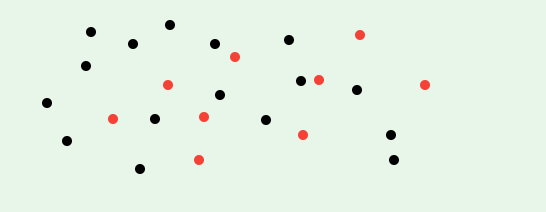

In [ ]:
%%html
<style>
  div {
    height: 200px;
    width: 550px;
    background: #e8f5e9;
  }
  .dot {
    height: 10px;
    width: 10px;
    border-radius: 5px;
    position: absolute;
  }
  .black {
    background: black;
  }
  .red {
    background: #ef5350;
  }
</style>
<div id="content"> </div>

<script>
  const content = document.getElementById("content");

  // Complétez le code...

  function createDot(x, y, color) {
    let dot = document.createElement("div");
    dot.className = "dot " + color;
    dot.style.left = (x - 4) + "px";
    dot.style.top = (y - 4) + "px";
    document.body.appendChild(dot);
  }

  content.addEventListener("click", event => {
    createDot(event.pageX, event.pageY, "black");
  });

  content.addEventListener("contextmenu", event => {
    event.preventDefault();
    createDot(event.pageX, event.pageY, "red");
  });

</script>

## Invoquer une fonction à intervalles réguliers

* Completez la fonction `invokeTimes` pour invoquer la fonction `func` fournie en argument un nombre donné d'exécutions (`noTimes`), de manière asynchrone et  à intervalles réguliers de `time` ms.

**CONSEIL**

Il est possible de le faire en utilisant `setTimeout` ou `setInterval`

<!--
const invokeTimes = (func, noTimes, time) => {
  let count = 0;
  let interval;
  let intervalHandler = () => {
    func(count);
    count += 1;
    if (count == noTimes) {
      clearInterval(interval);
    }
  };
  if (noTimes > 0) {
    interval = setInterval(intervalHandler, time);
  }
}
-->

In [ ]:
%%javascript

const invokeTimes = (func, noTimes, time) => {
  // Complétez le code...

  let count = 0;
  let interval;
  let intervalHandler = () => {
    func(count);
    count += 1;
    if (count == noTimes) {
      clearInterval(interval);
    }
  };

  if (noTimes > 0) {
    interval = setInterval(intervalHandler, time);
  }
}

const setup = function () {
    invokeTimes(function (i) {
        console.warn("hello " + i);
    }, 10, 1000);
};

setup();

<classroom_extensions.web.JavascriptWithConsole object>

## Déterminer l'ordre des événements

Considérez l'exemple de code JavaScript ci-dessous et determinez:

  1. Dans quel ordre les messages des gestionnaires d'événements s'afficheront-ils?

  2. Si vous souhaitez inhiber la propagation des événements dans la phase bubble après `div3`, comment pourriez-vous le faire?

<!--

function bubbleHandler (e) {
  console.log("Gestionnaire bubble appelé sur: " + e.currentTarget.id);
  console.log("Cible de l'événement: " + e.target.id);
  if (e.target.id == "three") {
    e.stopImmediatePropagation();
  }
}
-->

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div id="outer_div" class="row">
  <div class="col s12 m12 l6 xl6">
    <div id="one" class="card-panel blue lighten-1">
      <div id="two" class="card-panel deep-purple lighten-1">
        <div id="three" class="card-panel teal darken-3">
          <div id="four" class="card-panel indigo darken-2 center-align">
            <button id="btn" class="btn">Cliquez sur moi</button>
          </div>
        </div>
      </div>
    </div>
  </div>
</div>

<script>

function bubbleHandler (e) {
  console.log("Gestionnaire bubble appelé sur: " + e.currentTarget.id);
  console.log("Cible de l'événement: " + e.target.id);
}

function bubbleHandler2 (e) {
  console.log("Gestionnaire bubble 2 appelé sur: " +  e.currentTarget.id);
  console.log("Cible de l'événement: " + e.target.id);
  if (e.currentTarget.id == "three") {
    e.stopImmediatePropagation();
  }
}

function captureHandler (e) {
  console.log("Gestionnaire capture appelé sur: " +  e.currentTarget.id);
  console.log("Cible de l'événement: " + e.target.id);
}

const one = document.getElementById("one");
const two = document.getElementById("two");
const three = document.getElementById("three");
const four = document.getElementById("four");
const btn = document.getElementById("btn");

one.addEventListener("click", bubbleHandler);
two.addEventListener("click", bubbleHandler);
three.addEventListener("click", bubbleHandler);
three.addEventListener("click", bubbleHandler2);
four.addEventListener("click", bubbleHandler);
btn.addEventListener("click", bubbleHandler);

one.addEventListener("click", captureHandler, true);
two.addEventListener("click", captureHandler, true);
three.addEventListener("click", captureHandler, true);
four.addEventListener("click", captureHandler, true);
btn.addEventListener("click", captureHandler, true);

</script>

# Versions 3 et 4 de l'API DOM
---------------

Les versions 3 et 4 de l'API DOM ne changent pas le comportement par rapport à DOM 2, mais ajoutent plutôt de nouvelles fonctionnalités.

* Le DOM est une norme en [constante évolution](https://dom.spec.whatwg.org/#introduction-to-dom-events), et les navigateurs supportent continuellement un lot de nouvelles fonctionnalités.

* Une fonctionnalité intéressante ajoutée par les versions plus récentes du DOM est la possibilité de s'inscrire à des événements du DOM lui-même.

* Les observateurs de mutations (`MutationObserver`) sont déclenchés lorsque des noeuds de l'arbre du DOM changent.

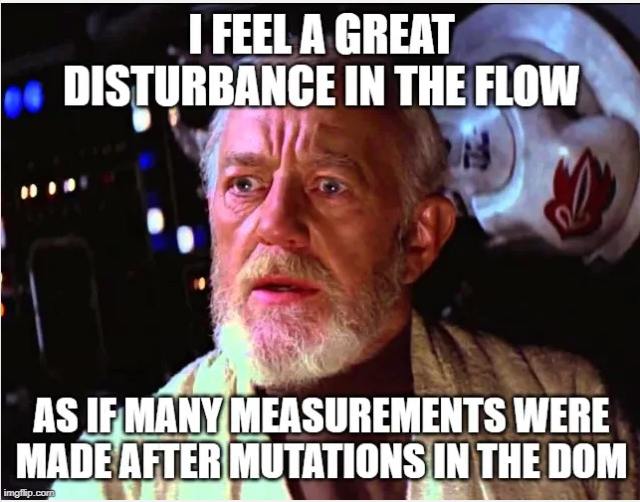

# Observateurs de mutations: configuration

* L'interface `MutationObserver` offre la possibilité de surveiller les modifications apportées à l'arbre DOM. La mauvaise utilisation peut, par contre, nuire à la performance.

**Exemple:**

```javascript
// Création d'un observateur de mutations
const observer = new MutationObserver(callback);

// Noeud sur lequel enregistrer l'observateur
const targetNode = document.getElementById("mybutton");

// Configuration de l'observateur:
// Inclure les changements aux attributs,
// la surveillance des noeuds ajoutés/retirés,
// et étendre la recherche aux noeuds descendants
const config = { attributes: true, childList: true, subtree: true };

/* Autres propriétés utiles:
- attributeFilter (restreindre à un tableau d'attributs à surveiller)
- attributeOldValue (true/false: rapporter la valeur précédente d'un attribut modifié)
- characterData, characterDataOldValue: rapporter les changements au texte contenu à l'intérieur des noeuds surveillés */

// Enregistrement d'un observateur sur un noeud donné
observer.observe(targetNode, config);

// Retrait de l'observateur (lorsqu'il n'est plus requis)
observer.disconnect();
```

* Source: [developer.mozilla.org](https://developer.mozilla.org/en-US/docs/Web/API/MutationObserver)

## Observateurs de mutations: traitement

* La fonction de rappel de traitement reçoit deux arguments:
  
  - `mutationList`: une liste des mutations détectés (objets `MutationRecord`).

  - `observer`: l'observateur de mutation.

```javascript
const callback = function(mutationsList, observer) {
  mutationList.forEach( mutation => {
    if (mutation.type === 'childList') {
      console.log("Ajout ou retrait d'un noeud enfant");
    }
    else if (mutation.type === 'attributes') {
      console.log('Un attribut a été modifié: ' + mutation.attributeName);
    }
  });
};
```

* Voir la spécification/documentation pour plus de détails sur les APIs de mutations.

Exemple: [Article de Jeff Griffith](https://codepen.io/milofultz/pen/LYjPXPw?editors=1111)

## Objet `MutationRecord`

L'objet `MutationRecord` (pour chacune des mutations) contient les propriétés principales suivantes:

* `addedNodes`, `removedNodes`: liste des noeuds ajoutés et retirés (NodeList)
* `attributeName`: nom de l'attribut modifié (ex., `href`)
* `oldValue`: valeur précédente d'un attribut modifié (si `attributeOldValue` est à `true` dans la configuration de l'observateur)
* `target`: noeud ayant subi la mutation
* `type`: type de mutation (ex., attributes, childList, etc.)

# Stockage de données par le navigateur
--------

Les navigateurs offrent deux objets pour stocker des données sur le client :

* [`window.localStorage`](https://developer.mozilla.org/fr/docs/Web/API/Window/localStorage) - utilisé pour stocker des données sans date d'expiration.

* [`window.sessionStorage`](https://developer.mozilla.org/fr/docs/Web/API/Window/sessionStorage) - utilisé pour stocker des données pour une session. Les données seront perdues lorsque l'onglet du navigateur est fermé.

Exemple pour tester si le navigateur offre du stockage:


In [ ]:
%%javascript

if (typeof(Storage) !== "undefined") {
  console.log("Navigateur supporte stockage local");
} else {
  console.log("Pas de support pour stockage local");
}

<classroom_extensions.web.JavascriptWithConsole object>

* L'exemple ci-dessous crée deux paires clé/valeur dans `localStorage`:
  - clé="character" et valeur="Snoopy"
  - clé="description" et valeur="Snoopy est..."

* Ensuite, l'exemple récupère les valeurs et les affecté aux contenus textes des éléments HTML.

In [ ]:
%%html

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div class="card">
<div class="card-content">
  <span class="card-title" id="title"> </span>
  <p class="flow-text" id="description"></p>
</div>
<div>

<script>
// Pour creer quelques items sur le stockage
localStorage.setItem("character", "Snoopy");
localStorage.setItem("description", `Snoopy est un chien, personnage principal
                                     du comic strip Peanuts, de race beagle
                                     qui a fait sa première apparence le 4 octobre 1950`);

// Pour recuperer de l'information
document.getElementById("title").textContent = localStorage.getItem("character");
document.getElementById("description").textContent = localStorage.getItem("description");
</script>

# Activité en classe
-----------

## Surveiller les modifications du DOM

Considérez le code html et JavaScript ci-dessous qui contient deux fonctions:

1. `colorElements(tag, color)`, qui permet de modifier la couleur du texte - via la propriété style (CSS) - en la remplaçant/définissant à `color`, pour tous les noeuds de type `tag`, qui sont des descendants du noeud dont l'`id` est `contents`. Cette fonction est déjà implémentée.

  * **Exemple:** invoquer `colorElements("a", "red")` remplacerait la couleur du texte en rouge pour tous les liens hypertextes situés à l'intérieur du `div` dont l'`id` est `contents`

2. `trapColorChanges(oldColor, newColor)`, qui permet d'observer les noeuds pour lesquels la couleur est modifiée pour prendre la valeur `oldColor` (mutations à la propriété `style`), qui sont descendants du noeud dont l'`id` est `contents`. Vous devez remplacer la couleur par `newColor`.
  * Cette fonction doit être implémentée.

À faire:

1. Définir un timer qui va invoquer `colorElements` afin de remplacer, après 5 secondes, la couleur de tous les noeuds (à l'intérieur de `contents`):
  - `span` en rouge (`red`)
  - `p` en bleu (`blue`)
  
2. Implémenter `trapColorChanges` tel que décrit ci-haut au moyen d'un observateur de mutations, puis l'invoquer afin d'intercepter les noeuds dont la couleur change en rouge (`red`), afin de plutôt remplacer la couleur par vert (`green`).

<!--
<script>

    /*
    Permet de modifier la couleur du texte via la propriété style CSS en la
    remplaçant/définissant à color, pour tous les noeuds de type tag, qui sont des
    descendants du noeud dont l'id est contents.
    - Exemple: invoquer colorElements("a", "red") remplacerait la couleur du texte en
    rouge pour tous les liens hypertextes (a) situés à l'intérieur
    du noeud div dont id=contents.
    */
    function colorElements(tag, color) {
        const elements = document.getElementById("contents").getElementsByTagName(tag);
        for (let i = 0; i < elements.length; i++) {
            const elt = elements[i];
            elt.style.color = color;
        }
    }

    /*
    Permet d'observer les noeuds pour lesquels la couleur est modifiée pour prendre
    la valeur oldColor (mutations à la propriété style), qui sont descendants du
    noeud dont id=contents. Vous devez remplacer la couleur par newColor.
    Cette fonction doit être implémentée au moyen d'un observateur de mutations.
    */
    function trapColorChanges(oldColor, newColor) {

        const callback = function (mutationsList, observer) {
            mutationsList.forEach( mutation => {
                if (mutation.type === 'attributes') {
                    console.log('Un attribut a été modifié: ' + mutation.attributeName);
                    console.log(mutation);

                    if (mutation.attributeName == "style" &&
                        mutation.target.style.color == oldColor) {
                        mutation.target.style.color = newColor;
                    }
                }
            });
        };

        // Création d'un observateur de mutations
        const observer = new MutationObserver(callback);

        // Noeud sur lequel enregistrer l'observateur
        const targetNode = document.getElementById("contents");

        // Configuration de l'observateur:
        // Inclure les changements aux attributs, la surveillance des noeuds
        // ajoutés/retirés, et étendre la recherche aux noeuds descendants
        const config = {attributes: true, childList: true, subtree: true};

        // Enregistrement d'un observateur sur un noeud donné
        observer.observe(targetNode, config);
    }

    /* 1. Définir un timer qui va invoquer colorElements afin de remplacer, après 5 secondes,
    la couleur de tous les noeuds (à l'intérieur de contents):
    - span en rouge (red)
    - p en bleu (blue)
    */
    setTimeout( () => {
        colorElements("span", "red");
        colorElements("p", "blue");
    }, 5000);

    // Compléter le code...

    // 2. Invoquer trapColorChanges afin d'intercepter les noeuds dont la couleur
    // change en rouge (red), afin de plutôt remplacer la couleur par vert (green)

    // Compléter le code...
    trapColorChanges("red", "green");

</script>
-->

In [ ]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<div class="flow-text" id="contents">
    <p>Lorem ipsum dolor sit amet, consectetur adipiscing elit.<p>
    <p>Nam aliquam magna et maximus porta.</p>
    <p>Cras dignissim <span>velit eu sollicitudin</span> varius.</p>
    <p>Nam nec est aliquam, interdum urna eget, euismod quam.</p>
    <p>Sed tempus <span>mi vitae mauris malesuada, </span>
    et laoreet nisl consectetur.</p>
    <p>Donec id risus eleifend, elementum nisl ac, dictum lacus.</p>
</div>

<script>

    /*
    Permet de modifier la couleur du texte via la propriété style CSS en la
    remplaçant/définissant à color, pour tous les noeuds de type
    tag, qui sont des descendants du noeud dont l'id est contents.
    - Exemple: invoquer colorElements("a", "red") remplacerait la couleur
    du texte en rouge pour tous les liens hypertextes (a) situés à l'intérieur
    du noeud div dont id=contents.
    */
    function colorElements(tag, color) {
        const elements = document.getElementById("contents").getElementsByTagName(tag);
        for (let i = 0; i < elements.length; i++) {
            const elt = elements[i];
            elt.style.color = color;
        }
    }

    /*
    Permet d'observer les noeuds pour lesquels la couleur est modifiée pour
    prendre la valeur oldColor (mutations à la propriété style), qui sont
    descendants du noeud dont id=contents. Vous devez remplacer la couleur
    par newColor. Cette fonction doit être implémentée au moyen d'un
    observateur de mutations.
    */
    function trapColorChanges(oldColor, newColor) {
        // Complétez le code...
        const callback = function (mutationsList, observer) {
            mutationsList.forEach( mutation => {
                if (mutation.type === 'attributes') {
                    console.log('Un attribut a été modifié: ' + mutation.attributeName);
                    console.log(mutation);

                    if (mutation.attributeName == "style" &&
                        mutation.target.style.color == oldColor) {
                        mutation.target.style.color = newColor;
                    }
                }
            });
        };

        // Création d'un observateur de mutations
        const observer = new MutationObserver(callback);

        // Noeud sur lequel enregistrer l'observateur
        const targetNode = document.getElementById("contents");

        // Configuration de l'observateur:
        // Inclure les changements aux attributs, la surveillance des noeuds
        // ajoutés/retirés, et étendre la recherche aux noeuds descendants
        const config = {attributes: true, childList: true, subtree: true};

        // Enregistrement d'un observateur sur un noeud donné
        observer.observe(targetNode, config);
    }

    /* 1. Définir un timer qui va invoquer colorElements afin de remplacer,
    après 5 secondes, la couleur de tous les noeuds (à l'intérieur de contents):
    - span en rouge (red)
    - p en bleu (blue)
    */

    // Complétez le code...
    setTimeout( () => {
        colorElements("span", "red");
        colorElements("p", "blue");
    }, 5000);

    // Compléter le code...

    // 2. Invoquer trapColorChanges afin d'intercepter les noeuds dont la couleur
    // change en rouge (red), afin de plutôt remplacer la couleur par vert (green)

    // Compléter le code...
    trapColorChanges("red", "green");

</script>

<!--
  /*
    Permet d'observer les noeuds pour lesquels la couleur est modifiée pour prendre
    la valeur oldColor (mutations à la propriété style), qui sont descendants du
    noeud dont id=contents. Vous devez remplacer la couleur par newColor.
    Cette fonction doit être implémentée au moyen d'un observateur de mutations.
    */
    function trapColorChanges(oldColor, newColor) {
        const callback = function (mutationsList, observer) {
            mutationsList.forEach( mutation => {
                if (mutation.type === 'attributes') {
                    console.log('Un attribut a été modifié: ' + mutation.attributeName);
                    console.log(mutation);

                    if (mutation.attributeName == "style" &&
                        mutation.target.style.color == oldColor) {
                        mutation.target.style.color = newColor;
                    }
                }
            });
        };

        // Création d'un observateur de mutations
        const observer = new MutationObserver(callback);

        // Noeud sur lequel enregistrer l'observateur
        const targetNode = document.getElementById("contents");

        // Configuration de l'observateur:
        // Inclure les changements aux attributs, la surveillance des noeuds
        // ajoutés/retirés, et étendre la recherche aux noeuds descendants
        const config = {attributes: true, childList: true, subtree: true};

        // Enregistrement d'un observateur sur un noeud donné
        observer.observe(targetNode, config);
    }

    /* 1. Définir un timer qui va invoquer colorElements afin de remplacer, après 5 secondes,
    la couleur de tous les noeuds (à l'intérieur de contents):
    - span en rouge (red)
    - p en bleu (blue)
    */
    setTimeout( () => {
        colorElements("span", "red");
        colorElements("p", "blue");
    }, 5000);

    // 2. Invoquer trapColorChanges afin d'intercepter les noeuds dont la couleur
    // change en rouge (red), afin de plutôt remplacer la couleur par vert (green)
    trapColorChanges("red", "green");
-->

# References
--------------
* JavaScript Bubbling and capturing, https://javascript.info/bubbling-and-capturing
* Marijn Haverbeke, Eloquent JavaScript, 3rd edition, 2018.
* Thomas Hunter, Distributed Systems with Node.js: Building Enterprise-Ready Backend Services, November, 2020.
* Understanding Event Loop, Call Stack, Event & Job Queue in Javascript, [Lien](https://medium.com/@Rahulx1/understanding-event-loop-call-stack-event-job-queue-in-javascript-63dcd2c71ecd)